In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import sys
sys.path.append('../py')

from plots import (
    set_grad_plot_fig_ax,
    set_grad_plot_styles,
    plot_activations,
    plot_function,
    plot_tangent_at_points,
    tangent_plot,
    plot_gradient_descent
    
)

In [2]:

demo_vector = np.array([[2,3],[3/2,1],[4,1.5]])
demo_vector.shape
demo_vector*2
no_col_vector = np.array([1,2,3])
no_col_vector.shape
u1 = np.array([4,5,6])
u2 = np.array([6,8,10])
u1@u2
np.arccos(u1@u2/np.linalg.norm(u1)/np.linalg.norm(u2)) # Dot Product // cosine similarity

0.03948736268788819

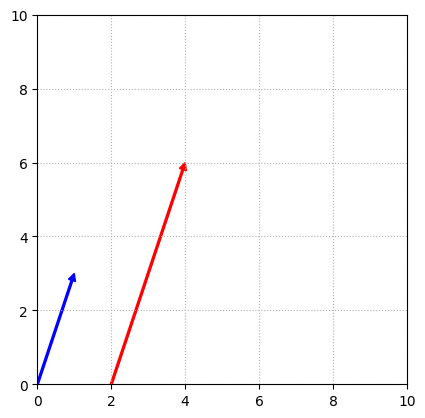

In [3]:
# MatLab PLot
fig, ax = plt.subplots()
options = {"width":0.05,"head_width":0.2, "head_length":0.2, "length_includes_head":True}
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.arrow(2,0,2,6,fc='r',ec='r',**options)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_aspect('equal')
ax.grid(True,ls=':')


In [4]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
X = ([[1,0],[0,1],[1,1],[0,0]]) # 4x2
W_H = np.random.rand(2,3)# initialize random array of size 2x3
W_O = np.random.rand(3,2)
H = X@W_H
O = H@W_O
H

array([[0.47591311, 0.18378628, 0.60159514],
       [0.92587841, 0.74219588, 0.92415389],
       [1.40179152, 0.92598216, 1.52574903],
       [0.        , 0.        , 0.        ]])

In [6]:
# BIAS TERMS
H.shape
b1 = np.full((4,3),3)
b1
H = X@W_H+b1
H

array([[3.47591311, 3.18378628, 3.60159514],
       [3.92587841, 3.74219588, 3.92415389],
       [4.40179152, 3.92598216, 4.52574903],
       [3.        , 3.        , 3.        ]])

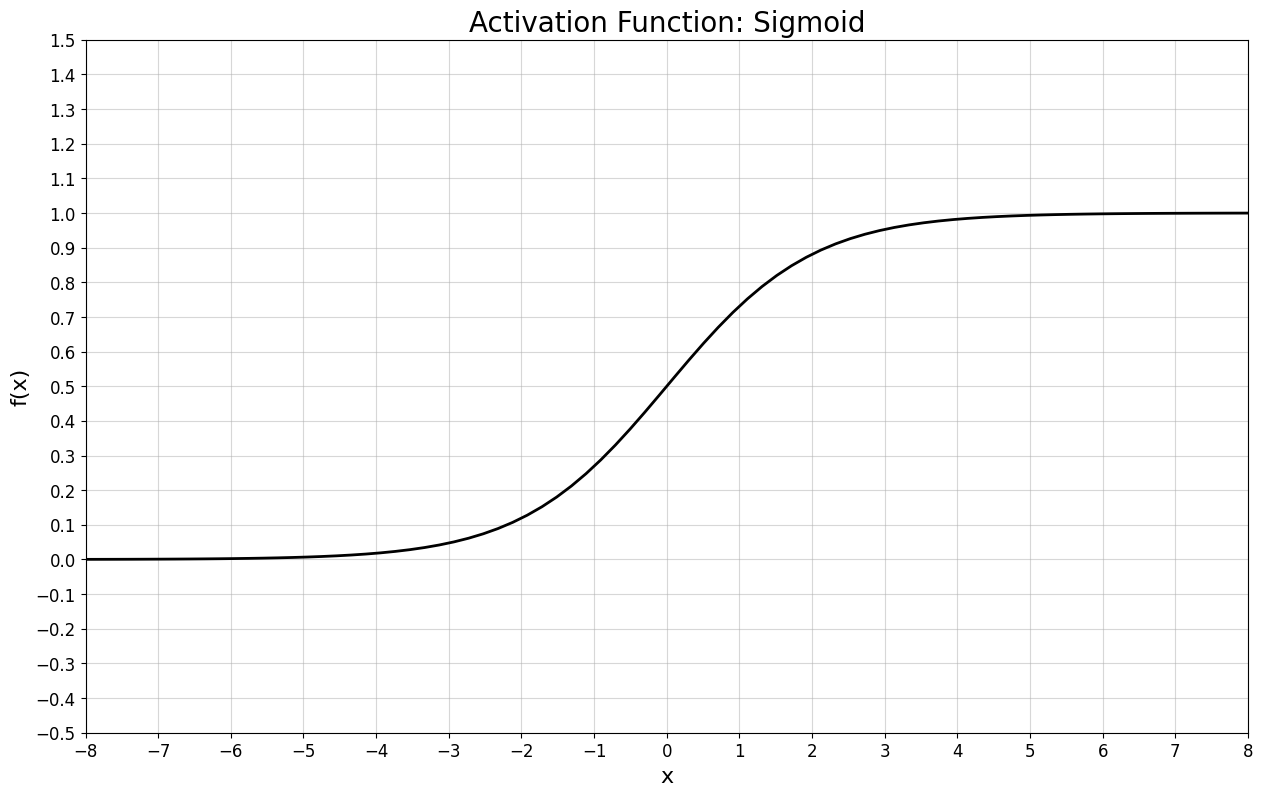

In [7]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))
x = np.linspace(-10, 10, 100)

plot_function(x, sigmoid(x), [-8,8], [-.5, 1.5], 'Activation Function: Sigmoid')

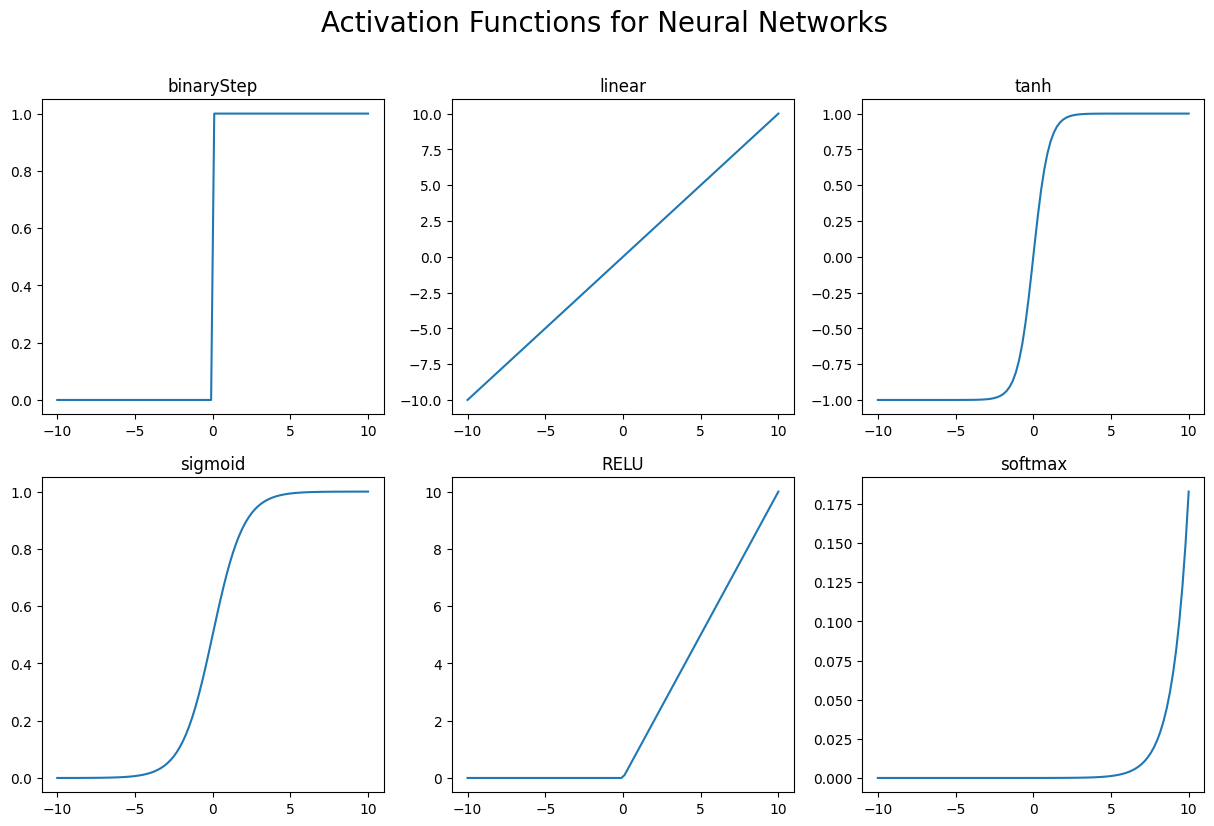

In [8]:
plot_activations(x)

In [9]:
def binaryStep(x):
    return 1*(x>0)
def linear(x):
    return x
def rELU(x):
    return x*(x>0)
binaryStep(0.1)
rELU(-1)

0

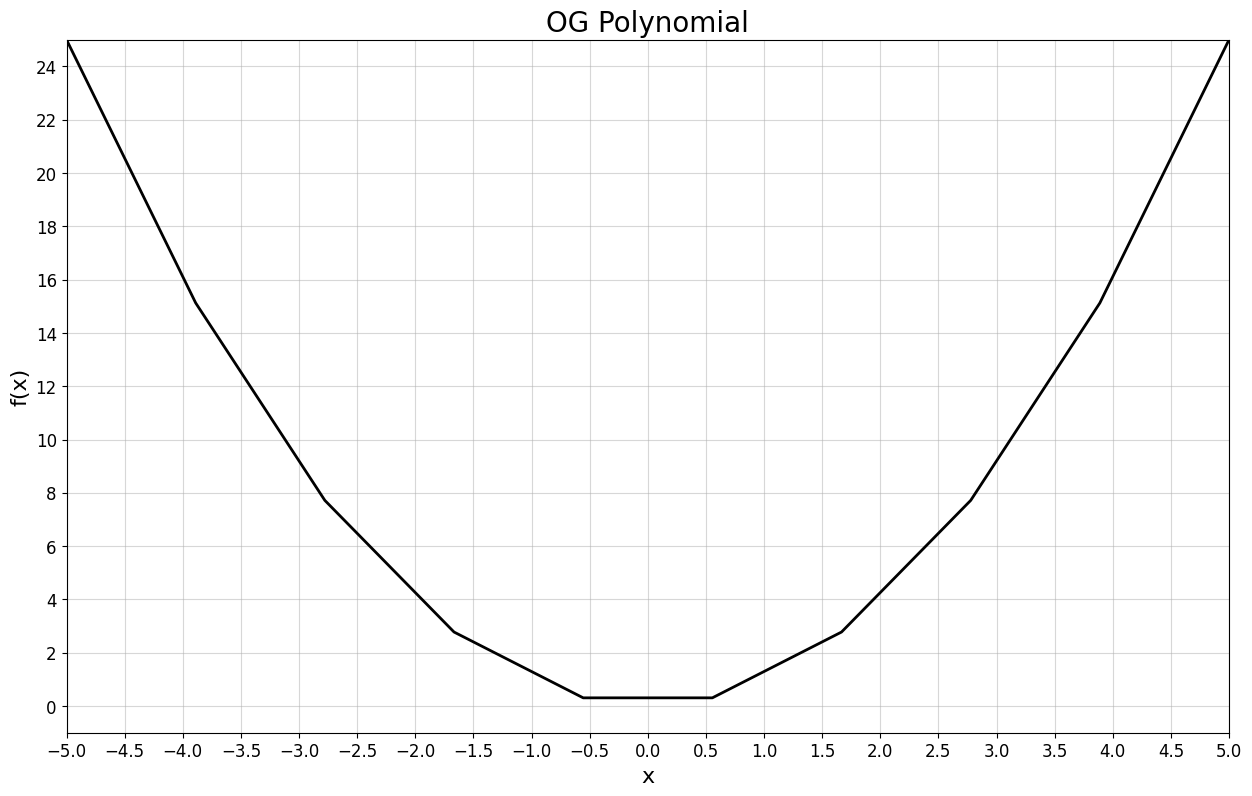

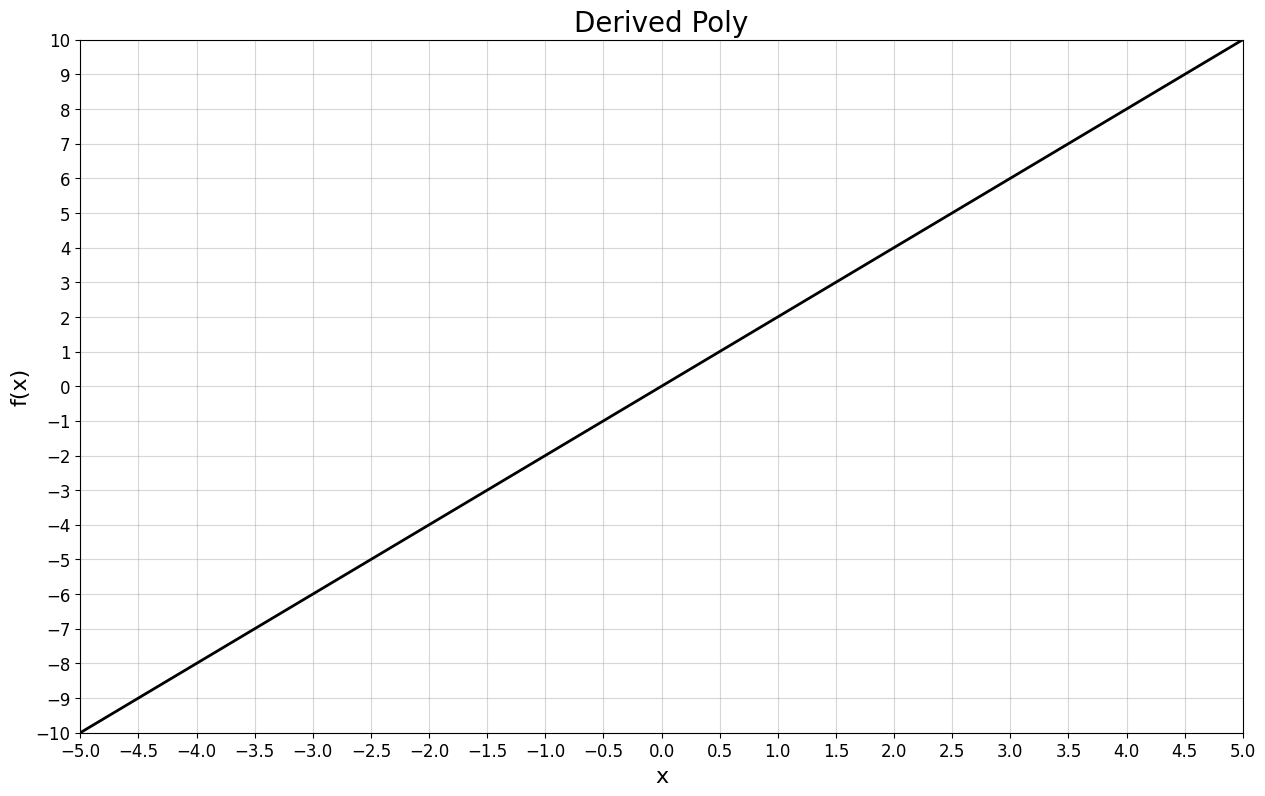

In [10]:
def derive_polynomial(x,n):
    return n*x**(n-1)

og_poly_x = np.linspace(-5,5,10)
og_poly_y = og_poly_x**2
dev_poly_x = og_poly_x
dev_poly_y = derive_polynomial(dev_poly_x,2)

plot_function(og_poly_x,og_poly_y,[-5,5],[-1,25],"OG Polynomial")
plot_function(dev_poly_x,dev_poly_y,[-5,5],[-10,10],"Derived Poly")
plt.show()

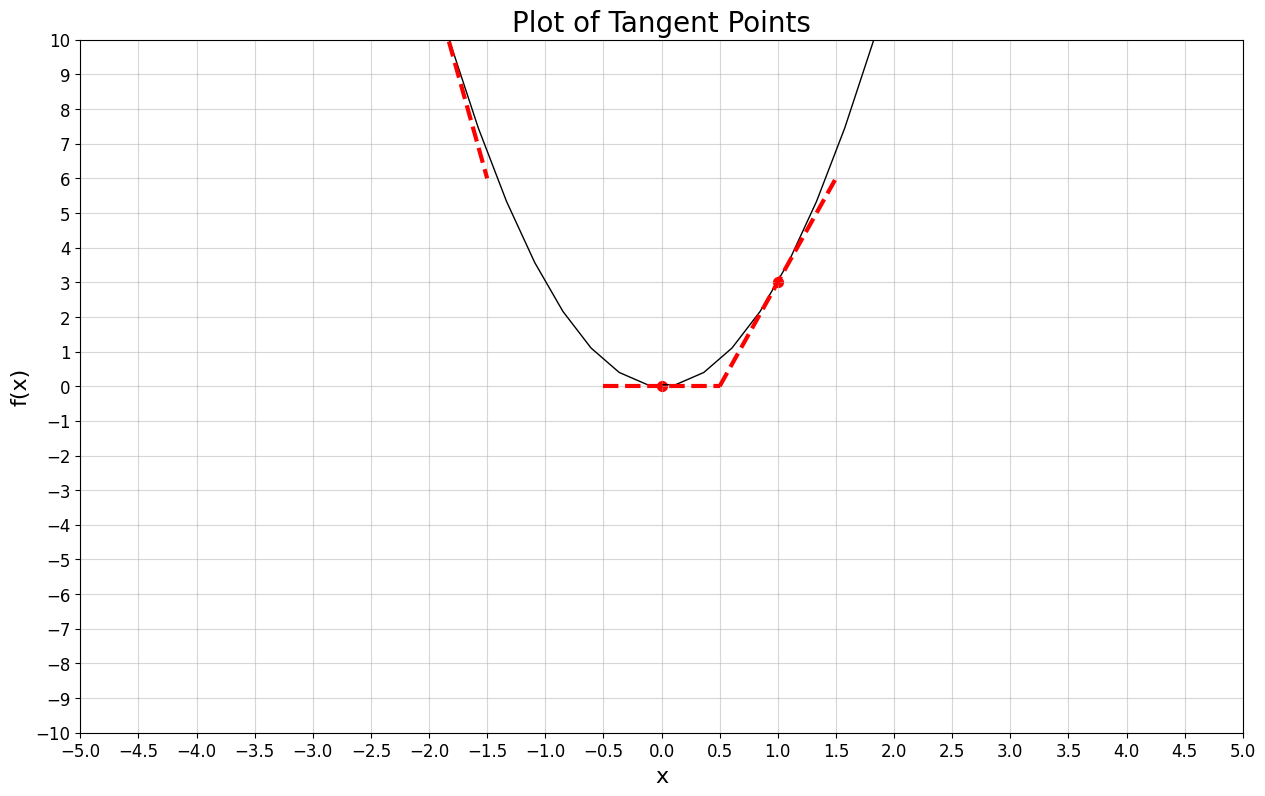

-1.7455034072411986


In [15]:
import random
import ipywidgets as widgets
from ipywidgets import interactive
def backprop_gradient_descent(gradient,learn_rate,epochs,start=12):
    for i in range(epochs):
        start += -learn_rate * gradient(start)
    return start
def poly2(x):
    return x**2
def poly2_deriv(x):
    return 2*x
def poly3(x):
    return x**3
def poly3_deriv(x):
    return 3*x**2
def poly3_deriv_deriv(x):
    return 6*x
gradient = backprop_gradient_descent(gradient=poly3,
                                     start=-3,
                                     learn_rate=0.01,
                                     epochs=10)
# interactive_gradient = interactive(tangent_plot,x1=(-8,8),step=100)
poly_x = np.linspace(-12,12,100)
plot_tangent_at_points(poly_x,poly3_deriv(poly_x),poly3_deriv,poly3_deriv_deriv,[-2,0,1])
#interactive_gradient
print(gradient)
